In [1]:
from sheet_id.models.DWD import DWD
from sheet_id.utils.dwd_utils import generateFullpagePrediction, inferBoundingBoxes
from sheet_id.utils.base_utils import visualizeBoundingBoxes
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/mirlab/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Pre-trained model

In [2]:
model = DWD(input_shape=(500,500,1), n_classes=124)
model.load_weights('../checkpoints/dwd-finetune-5000.h5')

# Test pre-trained model on a random sheet music

In [3]:
img = cv2.imread("/home/mirlab/prepped_tif/bach_bwv8491_v1/bach_bwv8491_v1-1.tif", 0)
img.shape

(4400, 3400)

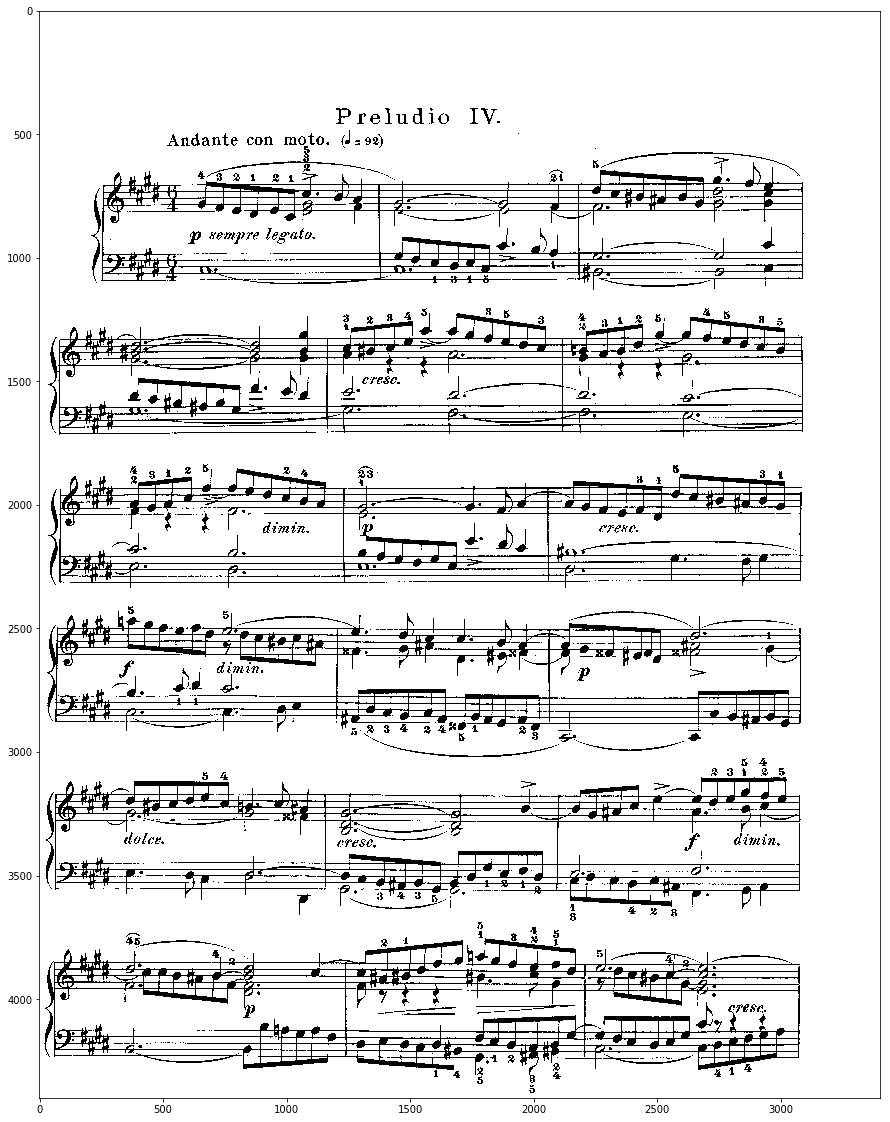

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
energy_map, class_map, bbox_map = generateFullpagePrediction(model, img)

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,20))
ax[0].imshow(img)
ax[0].set_title("Input image")
ax[1].imshow(energy_map)
ax[1].set_title("Energy map prediction")
ax[2].imshow(class_map)
ax[2].set_title("Class map prediction")
ax[3].imshow(bbox_map[:,:,0])
ax[3].set_title("Bounding box width prediction")
plt.show()

# Infer bounding boxes from model's predictions

In [ ]:
boxes, scores = inferBoundingBoxes(energy_map, class_map, bbox_map, non_max_suppression_factor=0.25)

In [ ]:
visualizeBoundingBoxes(img, boxes)